# COMP5310 PROJECT STAGE 2
### Assignment Group 30
### SID1: 540908237, SID2: , SID3: 

## Setup and Dependencies
This section imports all required libraries for preprocessing, modeling, evaluation, and visualization.

In [4]:
# Import all dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
import keras_tuner as kt

## Data Loading and Preprocessing
This section contains the code for loading and preprocessing the data.

In [6]:
# Import data

data = pd.read_csv("vsup0468_A1_CleanDataset.csv")
data.head()

,Make_Model,Price,Mileage,Fuel,Age,Previous_Owners,Horsepower,Gearing_Type,Displacement,Drive_Chain
0,Audi A1,15770.0,56012.8,Benzine,3.0,1.0,66.0,Automatic,1422.0,front
1,Audi A1,14640.0,83449.8,Diesel,3.0,1.0,85.0,Automatic,1461.0,front
2,Audi A1,16422.0,62110.8,Diesel,3.0,1.0,85.0,Automatic,1598.0,front
3,Audi A1,17990.0,26414.9,Benzine,3.0,1.0,85.0,Automatic,1461.0,front
4,Audi A1,18900.0,9752.0,Diesel,1.0,1.0,85.0,Automatic,1598.0,front


In [7]:
# Separate the features and target variable.

features_df = data.drop("Price", axis=1)
target_df = data["Price"]

In [8]:
# View the first 5 rows of features_df

features_df.head()

,Make_Model,Mileage,Fuel,Age,Previous_Owners,Horsepower,Gearing_Type,Displacement,Drive_Chain
0,Audi A1,56012.8,Benzine,3.0,1.0,66.0,Automatic,1422.0,front
1,Audi A1,83449.8,Diesel,3.0,1.0,85.0,Automatic,1461.0,front
2,Audi A1,62110.8,Diesel,3.0,1.0,85.0,Automatic,1598.0,front
3,Audi A1,26414.9,Benzine,3.0,1.0,85.0,Automatic,1461.0,front
4,Audi A1,9752.0,Diesel,1.0,1.0,85.0,Automatic,1598.0,front


In [9]:
# View the first 5 rows of target_df

target_df.head()

0    15770.0
1    14640.0
2    16422.0
3    17990.0
4    18900.0
Name: Price, dtype: float64

In [10]:
# Data preprocessing

## Define categorical and numerical features
categorical_features = features_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = features_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

## Preprocess categorical columns with one-hot encoding and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

features_df_preprocessed = preprocessor.fit_transform(features_df)

## Convert dataframe to numpy array
X_full = features_df_preprocessed
y_full = target_df.values

In [11]:
# Split full dataset to train, val, and test sets

# First split: train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_full, y_full, test_size=0.2, random_state=5310
)

# Second split: validation (10%) and test (10%) from temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=5310
)

In [12]:
# validate the train, val and test sets shape

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of X_val = {X_val.shape}")
print(f"Shape of y_val = {y_val.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (2783, 23)
Shape of y_train = (2783,)
Shape of X_val = (348, 23)
Shape of y_val = (348,)
Shape of X_test = (348, 23)
Shape of y_test = (348,)


## Predictive Models
This section contains the code for creating, optimizing, and evaluating the models.

### 1. Multilayer Perceptron (MLP)

Pseudocode:

#### Base setup for MLP model

In [17]:
# Define MLP Model
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile MLP model
mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train MLP model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = mlp_model.fit(X_train, y_train, 
                        validation_data=(X_val, y_val), 
                        epochs=50, 
                        batch_size=32, 
                        callbacks=[early_stop])

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 407820448.0000 - mae: 17027.8457 - val_loss: 331513984.0000 - val_mae: 16963.4258
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 389479584.0000 - mae: 16782.5098 - val_loss: 322172992.0000 - val_mae: 16700.0625
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 424209024.0000 - mae: 16484.1777 - val_loss: 292079040.0000 - val_mae: 15831.9023
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 330330240.0000 - mae: 15256.6016 - val_loss: 235391664.0000 - val_mae: 14065.8691
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 293899680.0000 - mae: 13487.7529 - val_loss: 161698256.0000 - val_mae: 11373.5010
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 230777392.0000 - mae: 10686.8135 - val_loss: 91506584.0000 - val_mae: 8050.3335
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 175366240.0000 - mae: 7234.9780 - val_loss: 45762732.0000 - val_mae: 5116.1772
Epoch 8/50


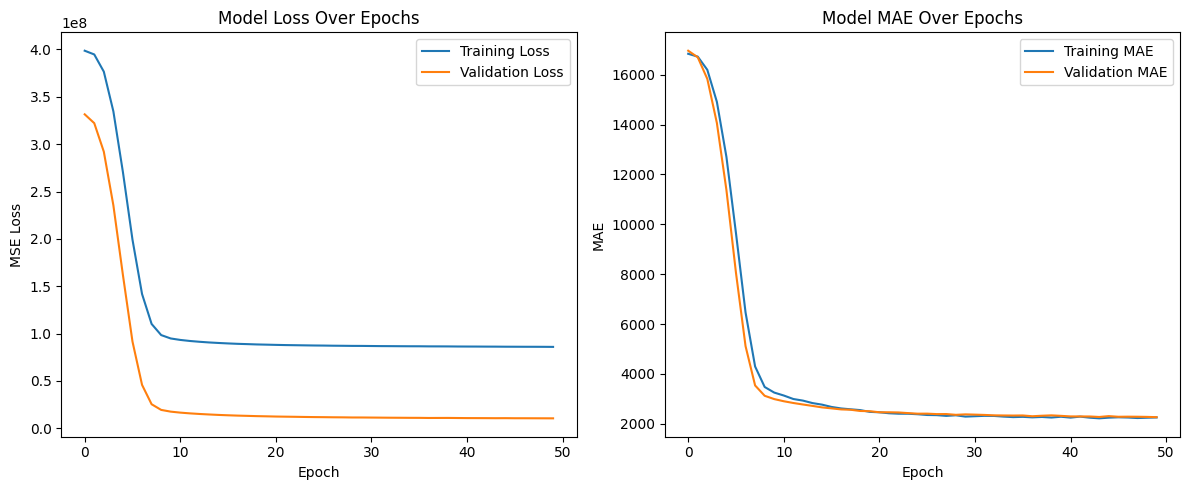

In [18]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Model MAE Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


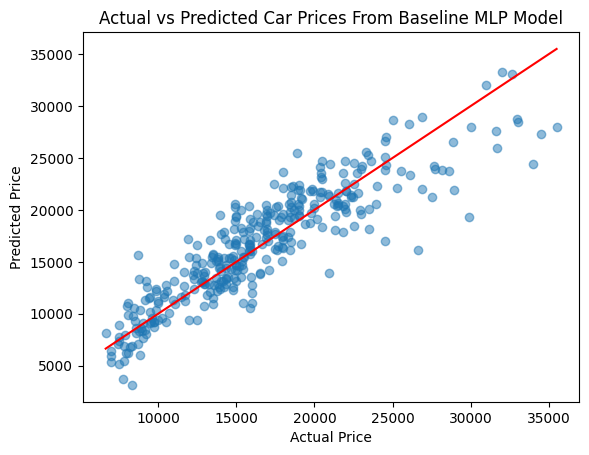

In [19]:
# Plot predictions vs actual

y_pred = mlp_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices From Baseline MLP Model")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect line
plt.show()

In [20]:
# Evaluate the Model

# Compute MSE and MAE
loss, mae = mlp_model.evaluate(X_test, y_test)
print(f"Baseline MSE: {loss:.4f}")
print(f"Baseline MAE: {mae:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 6145662.0000 - mae: 1848.2485
Baseline MSE: 6885330.5000
Baseline MAE: 1984.5219


#### Hyperparameter tuning for MLP model

In [22]:
# Define function to do hyperparameter tuning

def build_mlp_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
    
    # Tune number of layers and units
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))
    
    model.add(tf.keras.layers.Dense(1))  # output layer for regression
    
    # Compile with tuned learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='mse',
        metrics=['mae']
    )
    
    return model

In [23]:
# Initialize the tuner

tuner = kt.RandomSearch(
    build_mlp_model,
    objective='val_mae',
    max_trials=50,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='car_price_mlp'
)

In [24]:
# Search for the Best Hyperparameters

tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stop])

Trial 50 Complete [00h 00m 04s]
val_mae: 16844.048828125

Best val_mae So Far: 1931.2469482421875
Total elapsed time: 00h 02m 47s


In [25]:
# Retrieve the Best Model

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for param in best_hps.values:
    print(f" - {param}: {best_hps.get(param)}")

Best hyperparameters:
 - num_layers: 4
 - units_0: 160
 - activation: relu
 - learning_rate: 0.0009062713833672123
 - units_1: 64
 - units_2: 192
 - units_3: 128
 - units_4: 32


In [26]:
# Build and train final model

best_model = tuner.hypermodel.build(best_hps)
best_history = best_model.fit(X_train, y_train, 
                              validation_data=(X_val, y_val), 
                              epochs=50, 
                              batch_size=32, 
                              callbacks=[early_stop])

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 506847744.0000 - mae: 17121.8145 - val_loss: 90661432.0000 - val_mae: 7658.1768
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 127433056.0000 - mae: 4797.6548 - val_loss: 14239185.0000 - val_mae: 2612.4749
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 118690640.0000 - mae: 2745.9214 - val_loss: 11724239.0000 - val_mae: 2397.3623
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 64761468.0000 - mae: 2270.4082 - val_loss: 11631527.0000 - val_mae: 2450.1738
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 33242364.0000 - mae: 2244.1182 - val_loss: 11753407.0000 - val_mae: 2493.8333
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 112933368.0000 - mae: 2735.5034 - val_loss: 9607142.0000 - val_mae: 2099.2122
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 42866584.0000 - mae: 2004.8473 - val_loss: 11877155.0000 - val_mae: 2559.0962
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━

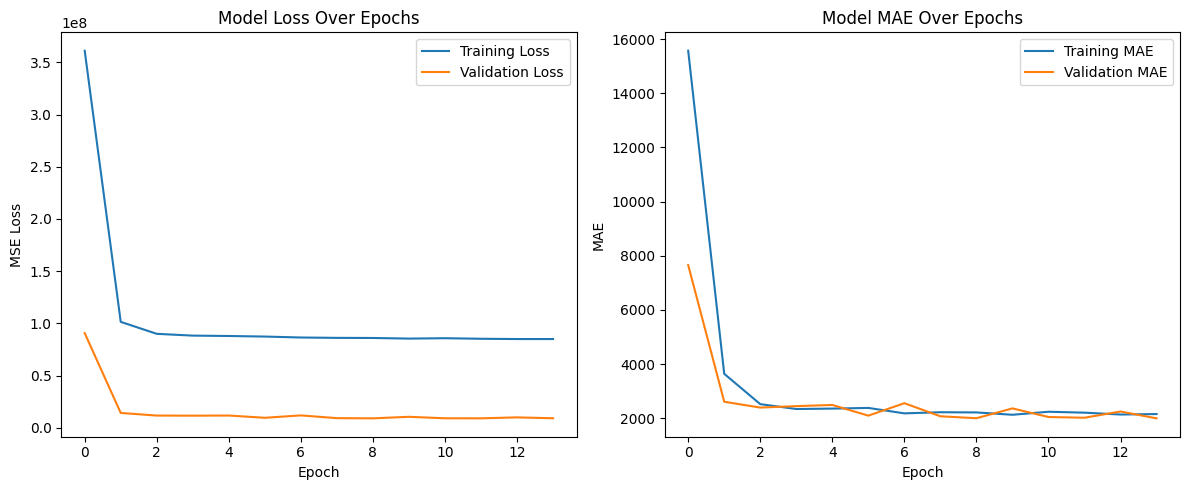

In [27]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(best_history.history['mae'], label='Training MAE')
plt.plot(best_history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Model MAE Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


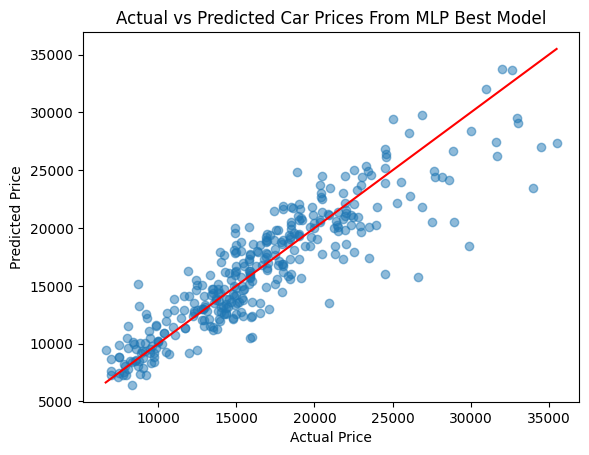

In [28]:
# Plot predictions vs actual

y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices From MLP Best Model")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect line
plt.show()

In [29]:
# Evaluate the Best Model

# Compute MSE and MAE
loss, mae = best_model.evaluate(X_test, y_test)
print(f"BEST MSE: {loss:.4f}")
print(f"BEST MAE: {mae:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5673065.0000 - mae: 1723.4998
BEST MSE: 6370491.0000
BEST MAE: 1834.6829


In [30]:
# Use Trained Best MLP Model to Predict on New Data

new_data = pd.DataFrame([{
    'Make_Model': 'Audi A1',
    'Mileage': 54000.0,
    'Fuel': 'Benzine',
    'Age': 3.0,
    'Previous_Owners': 1.0,
    'Horsepower': 85.0,
    'Gearing_Type': 'Automatic',
    'Displacement': 1600.0,
    'Drive_Chain': 'front'
}])

# Preprocess the New Data Using the Same Fitted Preprocessor
new_data_processed = preprocessor.transform(new_data)

predicted_price = best_model.predict(new_data_processed)
print(f"Predicted price: ${predicted_price[0][0]:,.2f} ± approx. ${mae:,.0f} (based on test MAE)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted price: $16,279.10 ± approx. $1,835 (based on test MAE)
